#**LAB 7 : Regression Part 2**

In this Lab we will look into the shortcomings of Linear Regression and see how those problems can be solved using Logistic Regression. We will also explore Polynomian Regression

  1. Polynomial Regression
  2. Linear Regression on a specific pattern of data to observe shortcomings
  3. Logistic Regression to solve those problems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Polynomial Regression

1. Generate data using relation $y=0.25x^{3}+1.25x^{2}-3x-3$
2. Corrupt y by adding random noise (uniformly sampled)
3. Fit the generated curve using different polynomial order. (Using matrix inversion and gradient descent)

In [2]:
## Use the Regression class defined in the previous lab

#Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)

class regression:
    # Constructor
    def __init__(self, name='reg'):
        self.name = name  # Create an instance variable

    def grad_update(self,w_old,lr,y,x):
        w = w_old + 2 * lr / y.shape[0] * (x @ (y - x.T @ w_old))
        return w

    def error(self,w,y,x):
        return np.mean((y - x.T@w)**2)

    def mat_inv(self, y, x_aug):
        #(XX')-1 XY
        return np.linalg.pinv((x_aug @ x_aug.T)) @ x_aug @ y
    
    # by Gradient descent
    def grad_descent(self,x,y,lr):
        err = []
        w_pred = np.random.uniform(-1, 1, (x.shape[0]))

        for i in range(int(1e+20)):
            w_pred = self.grad_update(w_pred,lr,y,x)
            err.append(self.error(w_pred,y,x))
            if i > 1:
                dev = np.abs(err[-2] - err[-1])
            else:
                dev = 1
            if dev<=0.000001:
                break

        return w_pred, err


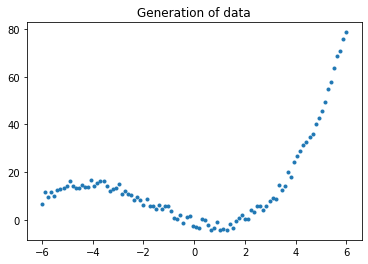

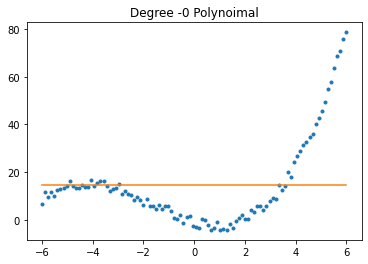

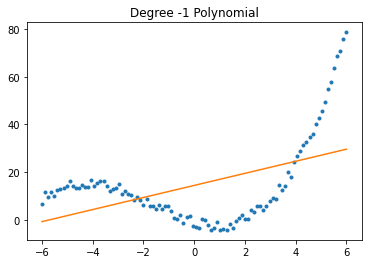

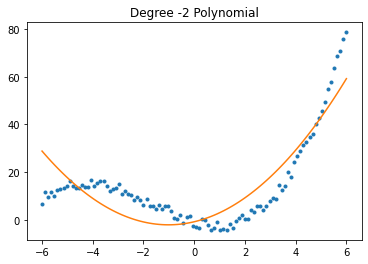

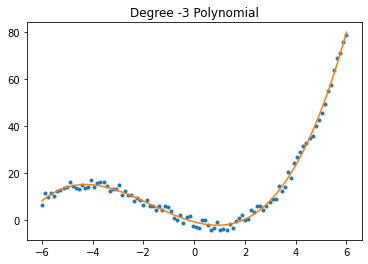

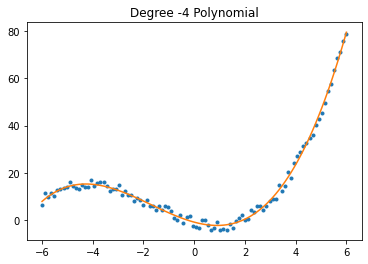

In [3]:
## Data generation

x=np.linspace(-6,6,100)

#assigning weights to the equation
w = np.array([0.25, 1.25, -3, -3])
w = np.flip(w)

def data_transform(X, degree):
    X_new = np.ones(X.shape)
    
    for i in range(1, degree+1):
        X_new = np.vstack((X_new, X**i))
    
    return X_new

X = data_transform(x, 3)

#Generate data using relation  𝑦=0.25𝑥3+1.25𝑥2−3𝑥−3
y = X.T@w

#Corrupt y by adding random noise (uniformly sampled)
y = y+5*np.random.uniform(0,1,y.shape)

plt.title('Generation of data')
plt.plot(x.T,y,'.')

#Fit the generated curve using different polynomial order. (Using matrix inversion and gradient descent)

#regression model 
reg=regression()

#plotting function
def PlotFunction(degree):
    X_1 = data_transform(x,degree)
    w_mat = reg.mat_inv(y,X_1)
    y_pred=X_1.T @ w_mat
    plt.figure()
    plt.plot(x.T,y,'.')
    plt.plot(x.T,y_pred)

# Code for degree 0 polynomial fitting

degree = 0
X_0 = data_transform(x,degree)
w_mat = (np.matmul(X_0, y))/(np.matmul(X_0, X_0.T))
y_pred = X_0.T*w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('Degree -0 Polynoimal')
plt.show()

for i in range(1, 5):
    PlotFunction(i)
    plt.title('Degree -'+ str(i) +' Polynomial')
    plt.show()

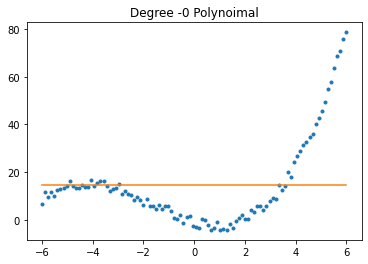

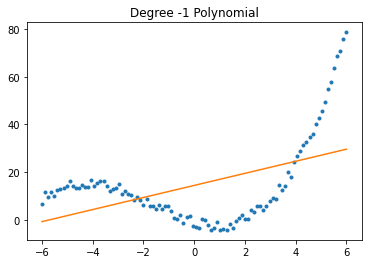

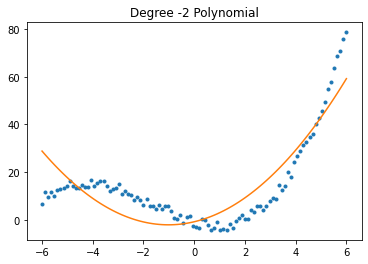

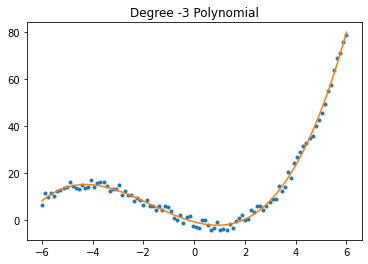

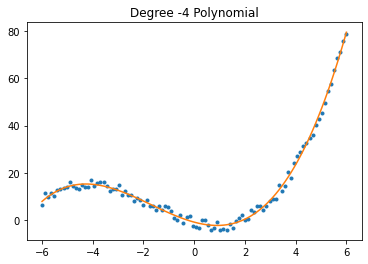

In [4]:
# By Gradient Descent 

#degree-0
X_t = data_transform(x,0)
X_data = (X_t[:, np.newaxis].T)

pred, error = reg.grad_descent(X_data, y, 0.001)

y_pred = pred@X_data

plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('Degree -0 Polynoimal')
plt.show()

for i in range(1, 5):
    PlotFunction(i)
    plt.title('Degree -'+ str(i) +' Polynomial')
    plt.show()

# Linear Regression

  Generate the data as shown in the figure below


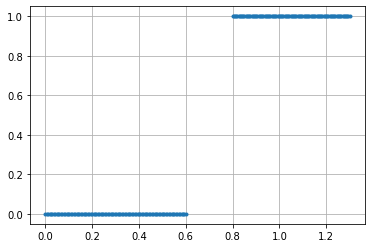

In [5]:
#generate data from ranges (0, 0.6) and (0.8, 1.3)

x1 = np.linspace(0,0.6,100)
x2 = np.linspace(0.8,1.3,100)

#form x - axis
x = np.concatenate((x1,x2))

#set to zero
y1 = np.zeros(x1.shape)
#set to one
y2 = np.ones(x2.shape)

#form y - axis
y = np.concatenate((y1,y2))

plt.figure()
plt.grid()
plt.plot(x,y, '.')
plt.show()

  Use the Regression class defined in the previous lab to fit the curve

In [6]:
## Write your Code here

class linear_regression:
  # Constructor
    def __init__(self, name='reg'):
        self.name = name  # Create an instance variable

    def grad_update(self,w_old,lr,y,x):
        w=w_old+(2/x.shape[1])*lr*(x @ (y-(x.T @ w_old)))
        return w

    def error(self,w,y,x):
        return np.mean(np.power((y-x.T @ w),2))

    def mat_inv(self,y,x_aug):
        return np.linalg.pinv((x_aug @ x_aug.T)) @ x_aug @ y
        # by Gradien descent
        
    def Regression_grad_des(self,x,y,lr):
        err=[]
        for i in range(1000):
            if i==0:
                w_init=np.random.uniform(-1,1,(x_aug.shape[0],1))
                w_old=w_init
                w_pred=self.grad_update(w_old,lr,y,x_aug)
            else:
                w_old=w_pred
                w_pred=self.grad_update(w_old,lr,y,x_aug)

                err.append(self.error(w_pred,y,x_aug))
                
            dev=np.abs(self.error(w_pred,y,x_aug)-self.error(w_old,y,x_aug))
            if dev<=0.000001:
                break

        return w_pred,err

  Augment the Data and generate optimal weights

In [7]:
#converting into column vector
x = x[:,np.newaxis]
x = x.T   #transpose
print('Shape of x :', x.shape)

#finding the augmented matrix
x_aug = np.concatenate((np.ones((1,x.shape[1])), x),axis=0)
print('Shape of Augmented x :', x_aug.shape)

#converting into column vector
y = y[:,np.newaxis]

#create a regression model and find optimal values of weight
linear_reg_1 = linear_regression()
w_opt = linear_reg_1.mat_inv(y,x_aug) 

Shape of x : (1, 200)
Shape of Augmented x : (2, 200)


[[-0.25988351]
 [ 1.12575335]]
[[-0.24056008]
 [ 1.10027945]]


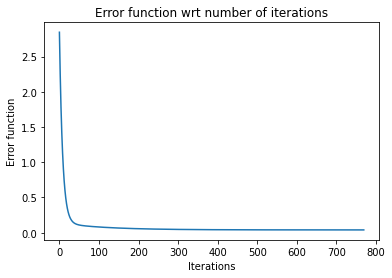

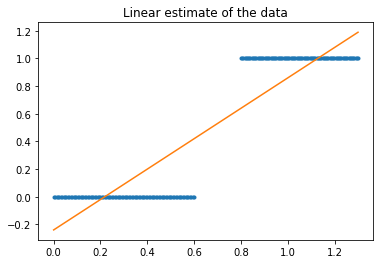

In [8]:
print(w_opt)

#learning rate
lr = 0.02

#gradient descent algorithm
w_grad,err = linear_reg_1.Regression_grad_des(x_aug,y,lr)

#weights gradient descet vector and shape
print(w_grad)

#plotting the error function w.r.t number of turns
plt.figure()
plt.title('Error function wrt number of iterations')
plt.xlabel('Iterations')
plt.ylabel('Error function')
plt.plot(err)

y_out = x_aug.T @ w_grad

#output predictions

plt.figure()
plt.title('Linear estimate of the data')
plt.plot(x.T,y,'.')
plt.plot(x.T,y_out)

#checking the numpy array where the values are less than 0.5
ind0 = np.where(y_out<0.5)

#checking the numpy array where the values are greater than 0.5
ind1 = np.where(y_out>=0.5)

x0 = x[:,ind0]
x1 = x[:,ind1]

Using the optimal weights, fit the curve

# Drawback of Linear regression based Classificaton

  Generate the Data as shown in the figure and follow the same steps as above to fit a curve using regression class 

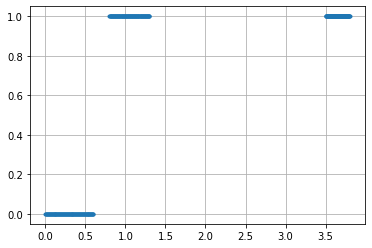

In [9]:
#Generate the Data 

#generate data from ranges (0, 0.6) and (0.8, 1.3)

x1 = np.linspace(0,0.6,100)
x2 = np.linspace(0.8,1.3,100)
x3 = np.linspace(3.5,3.8,100)
#form x - axis
x = np.concatenate((x1,x2,x3))

#set to zero
y1 = np.zeros(x1.shape)
#set to one
y2 = np.ones(x2.shape)
y3 = np.ones(x3.shape)

#form y - axis
y = np.concatenate((y1,y2,y3))

plt.figure()
plt.grid()
plt.plot(x,y, '.')
plt.show()

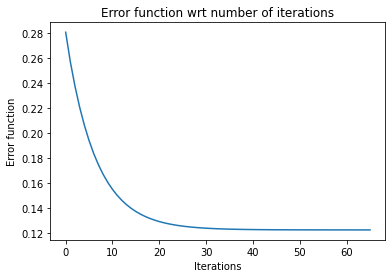

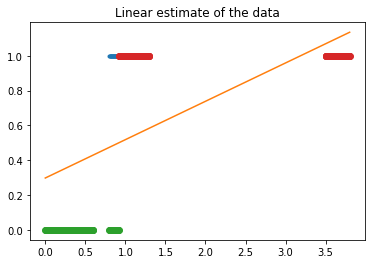

In [10]:
# Augmentation of data

x = np.concatenate((x1,x2,x3))
y = np.concatenate((y1,y2,y3))

#converting into column vectors
x = x[:,np.newaxis]
y = y[:,np.newaxis]

#taking transpose of matrix x

#augmented matrix
x_aug = np.concatenate((np.ones((1,x.shape[0])), x.T),axis=0)

learningRate = 0.1
linear_reg_2 = linear_regression()
w_grad,err = linear_reg_2.Regression_grad_des(x_aug,y,learningRate)

plt.figure()
plt.title('Error function wrt number of iterations')
plt.xlabel('Iterations')
plt.ylabel('Error function')
plt.plot(err)

y_pred=x_aug.T @ w_grad

plt.figure()
plt.title('Linear estimate of the data')
plt.plot(x,y,'.')
plt.plot(x,y_pred)

#plot for classification

ind0 =np.where(y_pred<0.5)
ind1 =np.where(y_pred>=0.5)

#plotting zero and ones prediction values
zero_pred = x[ind0]
ones_pred = x[ind1]

plt.plot(zero_pred, np.zeros(zero_pred.shape), 'o')
plt.plot(ones_pred, np.ones(ones_pred.shape), 'o')

# Logistic regression

  Error Surface (Comparison between Logistic Loss and Mean Squared Error)

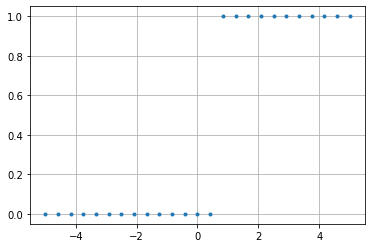

In [11]:
x = np.linspace(-5,5,25)
y = np.zeros(x.shape)
y[np.where(x>0.7314)] = 1

plt.grid()
plt.plot(x,y,'.')

1. MSE=$\frac{1}{2N}\sum_{i=1}^{N}(y^{p}_{i}-y_{i})^2$, where $y^{p}=\frac{1}{1+e^{-w^{T}x}}$
2. Logistic loss=$-\frac{1}{N}\sum_{i=1}^{N}y_{i}log(y^{p}_{i})+(1-y_{i})log(1-y_{i}^{p})$

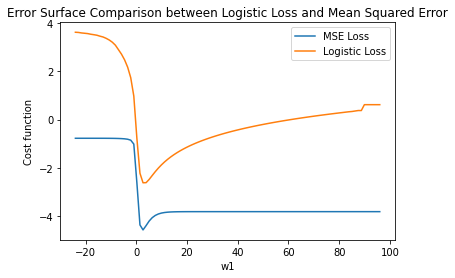

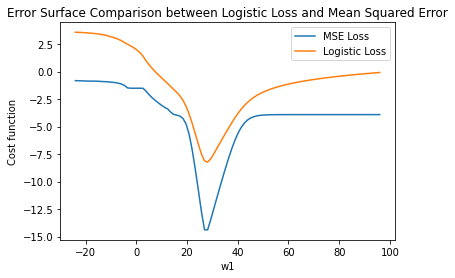

In [12]:
# search space (only w1 is searched, where as w0 is fixed)

#intializing w0 and creating search space
w1_in = 10/(x[1]-x[0])
w0 = -0.7314
w1 = np.linspace(-w1_in,4*w1_in,100)

cost_fn_mse=[]
cost_fn_logis=[]

for i in range(w1.shape[0]):
    
    #defining g(x)
    z = w0 + w1[i]*x
    
    #activation function -sigmoid function
    h_w = 1/(1+np.exp(-(z)))
    
    #calculating the MSE
    cost_mse=np.sum((h_w-y)**(2))/(2*x.shape[0])
    cost_fn_mse.append(cost_mse)
    
    #calculating the logarithimic cost function
    cost_logis=(-np.sum(y * np.log(h_w+10**(-20))+(1-y)*np.log(1-h_w+10**(-20)))/(x.shape[0]))
    cost_fn_logis.append(cost_logis)
    
# Ploting of error surface
plt.figure()
plt.xlabel('w1')
plt.ylabel('Cost function')
plt.title('Error Surface Comparison between Logistic Loss and Mean Squared Error')
plt.plot(w1,np.log(cost_fn_mse),label='MSE Loss')
plt.plot(w1,np.log(cost_fn_logis),label = 'Logistic Loss')
plt.legend()
plt.show()

#for another value of w0
w0 = -17

cost_fn_mse=[]
cost_fn_logis=[]

for i in range(w1.shape[0]):
    
    #defining g(x)
    z = w0 + w1[i]*x
    
    #activation function -sigmoid function
    h_w = 1/(1+np.exp(-(z)))
    
    #calculating the MSE
    cost_mse=np.sum((h_w-y)**(2))/(2*x.shape[0])
    cost_fn_mse.append(cost_mse)
    
    #calculating the logarithimic cost function
    cost_logis=(-np.sum(y * np.log(h_w+10**(-20))+(1-y)*np.log(1-h_w+10**(-20)))/(x.shape[0]))
    cost_fn_logis.append(cost_logis)
    
# Ploting of error surface
plt.figure()
plt.xlabel('w1')
plt.ylabel('Cost function')
plt.title('Error Surface Comparison between Logistic Loss and Mean Squared Error')
plt.plot(w1,np.log(cost_fn_mse),label='MSE Loss')
plt.plot(w1,np.log(cost_fn_logis),label = 'Logistic Loss')
plt.legend()
plt.show()

**Solving the Outlier Issue**

  Generate the Data as shown in the figure

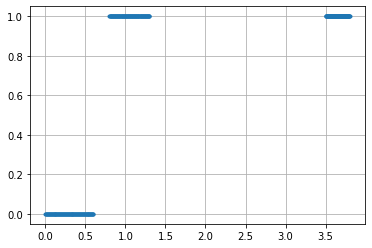

In [13]:
#Generate the Data 

#generate data from ranges (0, 0.6) and (0.8, 1.3)

x1 = np.linspace(0,0.6,100)
x2 = np.linspace(0.8,1.3,100)
x3 = np.linspace(3.5,3.8,100)
#form x - axis
x = np.concatenate((x1,x2,x3))

#set to zero
y1 = np.zeros(x1.shape)
#set to one
y2 = np.ones(x2.shape)
y3 = np.ones(x3.shape)

#form y - axis
y = np.concatenate((y1,y2,y3))

plt.figure()
plt.grid()
plt.plot(x,y, '.')
plt.show()

Define a Logistic Regression class

In [14]:
class logis_regression:
  # Constructor
    def __init__(self, name='reg'):
        self.name = name  # Create an instance variable

    def logis(self,x,w_old):
        op=1/(1+np.exp(-(x.T @ w_old)))
        return op

    def grad_update(self,w_old,lr,y,x):
        w=w_old+(1/x.shape[1])*lr*(x@(y-(self.logis(x,w_old))))
        return w

    def error(self,w,y,x):
        return -np.mean(y*np.log(self.logis(x,w)+10**(-50))+(1-y)*np.log(1-self.logis(x,w)+10**(-50)))

    # by Gradien descent
    def Regression_grad_des(self,x,y,lr):
        err=[]
        for i in range(1000):
            if i==0:
                w_init=np.random.uniform(-1,1,(x_aug.shape[0],1))
                w_old=w_init
                w_pred=self.grad_update(w_old,lr,y,x_aug)
            else:
                w_old=w_pred
                w_pred=self.grad_update(w_old,lr,y,x_aug)

            err.append(self.error(w_pred,y,x_aug))
            
            dev=np.abs(self.error(w_pred,y,x_aug)-self.error(w_old,y,x_aug))
            if dev<=10**(-20):
                break

        return w_pred,err

Augment the data and fit the curve by obtaining optimal weights (Using Gradient Descent)

[[-2.95325133]
 [ 4.59560547]]


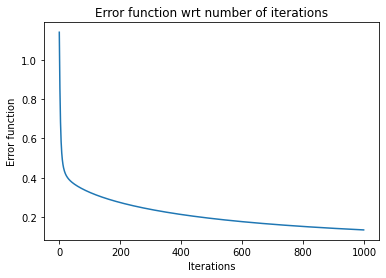

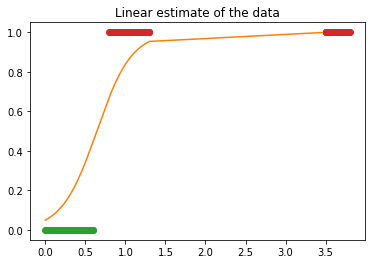

In [15]:
#Creating augmented matrix

#converting into column vectors
x = x[:,np.newaxis]
y = y[:,np.newaxis]

#using the transpose of matrix x
x_aug=np.concatenate((np.ones((1,x.shape[0])), x.T),axis=0)


logistic_reg_1 = logis_regression()
w_pred,err = logistic_reg_1.Regression_grad_des(x_aug,y,0.1)
print(w_pred)

plt.figure()
plt.title('Error function wrt number of iterations')
plt.xlabel('Iterations')
plt.ylabel('Error function')
plt.plot(err)
plt.show()

# output computation
y_pred = logistic_reg_1.logis(x_aug,w_pred)

plt.figure()
plt.title('Linear estimate of the data')
plt.plot(x,y,'.')
plt.plot(x,y_pred)


#plot for classification

ind0 = np.where(y_pred<0.5)
ind1 = np.where(y_pred>=0.5)

zero_pred = x[ind0]
ones_pred = x[ind1]

plt.plot(zero_pred, np.zeros(zero_pred.shape), 'o')
plt.plot(ones_pred, np.ones(ones_pred.shape), 'o')
plt.show()

# Classification of circularly separated data using logistic regression



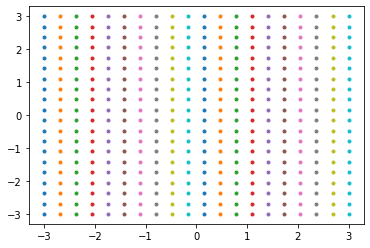

In [16]:
x1=np.linspace(-3,3,20)
x2=np.linspace(-3,3,20)

x11,x22=np.meshgrid(x1,x2)
plt.plot(x11,x22,'.')

  Using the above data generate circular data

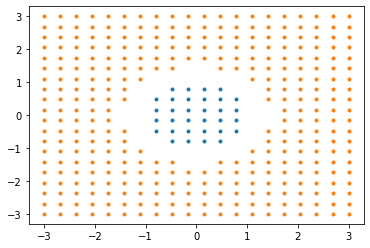

In [17]:
x1 = x11.flatten()
x2 = x22.flatten()

#converting into column vectors
x1 = x1[:, np.newaxis]
x2 = x2[:, np.newaxis]

#stacking the 2 column vectors vertically
x = np.concatenate((x1, x2), axis=1)

section_1 = np.where((x[:,0]**(2)+x[:,1]**(2))<=0.9) #checking for points which are outside the circle with radius 0.9
section_2 = np.where((x[:,0]**(2)+x[:,1]**(2))>2.2) #checking for points which are inside the circle with radius 2.2

x_s1 = x[section_1]
x_s2 = x[section_2]

x_new = np.concatenate((x_s1, x_s2))

plt.plot(x_s1[:,0], x_s1[:,1], '.')
plt.plot(x_s2[:,0], x_s2[:,1], '.')
plt.show()

As in case of circularly separated data, the boundary is nonlinear, so squared feature is taken.

[[-3.45447336]
 [ 2.48755902]
 [ 2.48802738]]


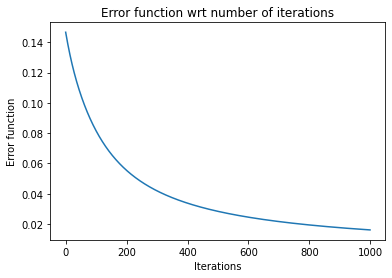

In [18]:
# perform logistic regression

#tags for the data
y1 = np.zeros((x_s1.shape[0])) #zero for blue portion
y2 = np.ones((x_s2.shape[0])) #one for yellow portion
y = np.concatenate((y1,y2))

#As in case of circularly separated data, the boundary is nonlinear, so squared feature is taken.

#Augmenting accordingly with (x.T)**2
x_aug = np.concatenate((np.ones((1,x_new.shape[0])), (x_new.T)**(2)), axis=0)

#setting parameters and building model
lr = 0.3
logistic_reg_2 = logis_regression()
w_pred, err = logistic_reg_2.Regression_grad_des(x_aug, y[:,np.newaxis], lr)
print(w_pred)

#plotting
plt.figure()
plt.title('Error function wrt number of iterations')
plt.xlabel('Iterations')
plt.ylabel('Error function')
plt.plot(err)
plt.show()

Plot classification using 0.5 as threshold

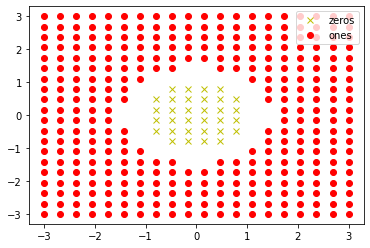

In [19]:
y_pred = logistic_reg_2.logis(x_aug,w_pred)

ind1,_ = np.where(y_pred<0.5)
ind2,_ = np.where(y_pred>=0.5)

index_0 = x_new[ind1]
index_1 = x_new[ind2]

plt.figure()
plt.plot(index_0[:,0],index_0[:,1],'x',color='y')
plt.plot(index_1[:,0],index_1[:,1],'o',color='r')
plt.Circle((0.5, 0.5), 1, color='blue')
plt.legend(['zeros', 'ones'])
plt.show()

# Multiclass logistic regression

1. Generate 1D data with 3 classes


### One vs rest classification

1. Lets take a polynomial of order 2 (by seeing the data distribution)

(300,)


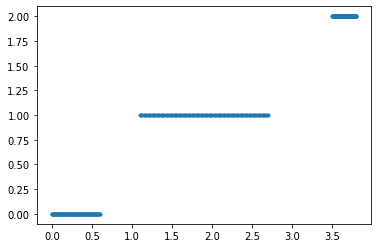

In [20]:
## Write your code here

import numpy as np
import matplotlib.pyplot as plt

x1=np.linspace(0,0.6,100)
x2=np.linspace(1.1,2.7,100)
x3=np.linspace(3.5,3.8,100)

x=np.concatenate((x1,x2,x3))
print(x.shape)

y1=np.zeros(x1.shape)
y2=np.ones(x2.shape)
y3=np.tile([2],x3.shape)

y=np.concatenate((y1,y2,y3))

plt.figure()
plt.plot(x,y,'.')


In [21]:
def data_transform(X,degree): 
    X_new = [] 
    
    for i in range(degree +1):
        X_new.append(X**i)            
    X_new = np.concatenate(X_new)  
    
    return X_new

x_aug = data_transform(x[np.newaxis,:],2)
print(x_aug.shape)

(3, 300)


In [22]:
# plot for classification
def plot_op(x,y_pred):

    ind0,_=np.where(y_pred<0.5)
    ind1,_=np.where(y_pred>=0.5)
    x0=x[ind0,:]
    x1=x[ind1,:]
    plt.plot(x0,np.zeros((x0).shape),'o',color='y')
    plt.plot(x1,np.ones((x1).shape),'x',color='r')


Using the above function for plotting, plot the curve using different configurations

[[-3.23463904]
 [ 0.53414363]
 [ 2.92641172]]


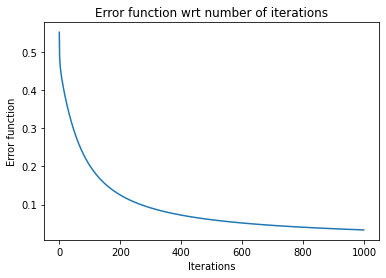

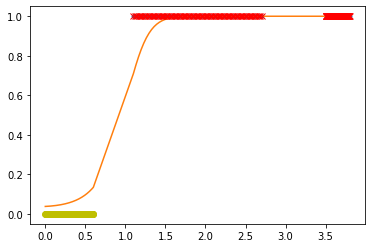

In [23]:
# take class 0 as '0' and other to '1'

#checking the index
index_check = (np.where(y!=0))
y1_mod = np.zeros(y.shape)
y1_mod[index_check] = np.ones((len(index_check)))

#creating the logistic regression model
log_reg_1 = logis_regression()

w1_pred,err = log_reg_1.Regression_grad_des(x_aug,y1_mod[:,np.newaxis],0.1)

plt.figure()
plt.title('Error function wrt number of iterations')
plt.xlabel('Iterations')
plt.ylabel('Error function')
plt.plot(err)
print(w1_pred)


# ploting
plt.figure()
plt.plot(x,y1_mod,'.')

y1_pred = log_reg_1.logis(x_aug,w1_pred)
plt.plot(x,y1_pred[:,0])
plot_op(x[:,np.newaxis],y1_pred)

[[ 3.08749745]
 [-5.32694527]
 [ 1.44559162]]


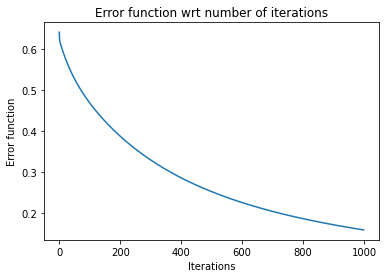

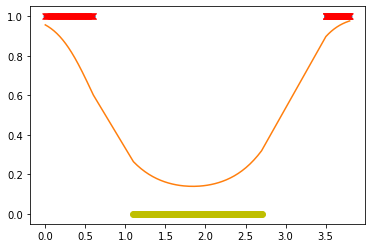

In [24]:
# take class 1 as '0' and other to '1'

#changing the indices of the classes
index_check = (np.where(y!=1))

y2_mod = np.zeros(y.shape)
y2_mod[index_check] = np.ones((len(index_check)))

#creating the logistic regression model
log_reg_2 = logis_regression()
w2_pred,err = log_reg_2.Regression_grad_des(x_aug,y2_mod[:,np.newaxis],0.1)


# ploting
plt.figure()
plt.title('Error function wrt number of iterations')
plt.xlabel('Iterations')
plt.ylabel('Error function')
plt.plot(err)
print(w2_pred)

plt.figure()
plt.plot(x,y2_mod,'.')

y2_pred = log_reg_2.logis(x_aug,w2_pred)
plt.plot(x,y2_pred[:,0])
plot_op(x[:,np.newaxis],y2_pred)

[[ 3.57848799]
 [ 3.21999215]
 [-1.47627042]]


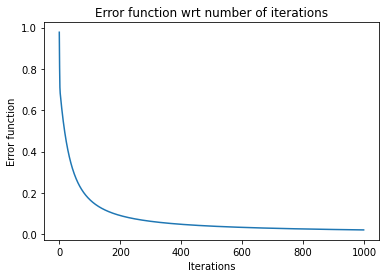

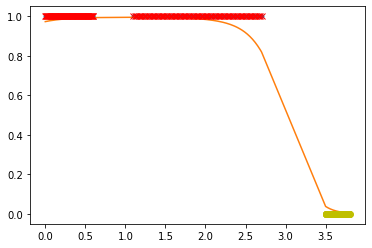

In [25]:
# Take class 2 as '0' and other to '1'

index_check = (np.where(y!=2))

y3_mod = np.zeros(y.shape)
y3_mod[index_check] = np.ones((len(index_check)))

#creating the logistic regression model
log_reg_3 = logis_regression()
w3_pred,err = log_reg_3.Regression_grad_des(x_aug,y3_mod[:,np.newaxis],0.1)


# ploting
plt.figure()
plt.title('Error function wrt number of iterations')
plt.xlabel('Iterations')
plt.ylabel('Error function')
plt.plot(err)
print(w3_pred)

plt.figure()
plt.plot(x,y3_mod,'.')


y3_pred = log_reg_3.logis(x_aug,w3_pred)
plt.plot(x,y3_pred[:,0])

plot_op(x[:,np.newaxis],y3_pred)

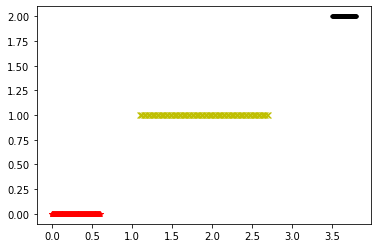

In [26]:
# final classification

ind1,_ = np.where(y1_pred<0.5)
ind2,_ = np.where(y2_pred<0.5)
ind3,_ = np.where(y3_pred<0.5)

x1 = x[ind1]
x2 = x[ind2]
x3 = x[ind3]

plt.figure()
plt.plot(x1,np.zeros(x1.shape),'*',color='r')
plt.plot(x2,np.ones(x2.shape),'x',color='y')
plt.plot(x3,np.tile([2],x3.shape),'.',color='k')
plt.show()